Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost =  2.750700754
Epoch: 0002 cost =  1.125211328
Epoch: 0003 cost =  0.896541320
Epoch: 0004 cost =  0.782448814
Epoch: 0005 cost =  0.711137499
Epoch: 0006 cost =  0.661537205
Epoch: 0007 cost =  0.623081659
Epoch: 0008 cost =  0.593247164
Epoch: 0009 cost =  0.568106668
Epoch: 0010 cost =  0.547440988
Epoch: 0011 cost =  0.529214563
Epoch: 0012 cost =  0.513687276
Epoch: 0013 cost =  0.499637745
Epoch: 0014 cost =  0.487527947
Epoch: 0015 cost =  0.475849164
Learning finished.
Accuracy:  0.8915
Label:  [8]
Prediction:  [8]


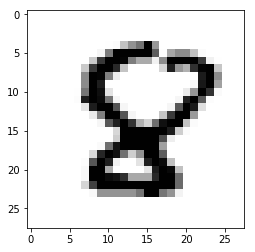

In [31]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_clsses = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_clsses])

W = tf.Variable(tf.random_normal([784, nb_clsses]))
b = tf.Variable(tf.random_normal([nb_clsses]))

# hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                X: batch_xs, Y: batch_ys
            })
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
        
    print("Learning finished.")
    
    # test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
        X: mnist.test.images, Y: mnist.test.labels
    }))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.arg_max(mnist.test.labels[r: r + 1], 1)))
    print("Prediction: ", sess.run(tf.arg_max(hypothesis, 1), feed_dict={
        X: mnist.test.images[r:r + 1]
    }))
    
    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest'
    )
    plt.show()
    